## <font color='blue'> Import libraries </font> 

In [75]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from sklearn.cluster import Birch
import time
from collections import Counter
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
import plotly.io as pio

#pio.renderers
#pio.renderers.default = "svg"
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## <font color='blue'> Read data </font> 

In [76]:
df=pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## <font color='blue'> Data exploration</font> 

In [77]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


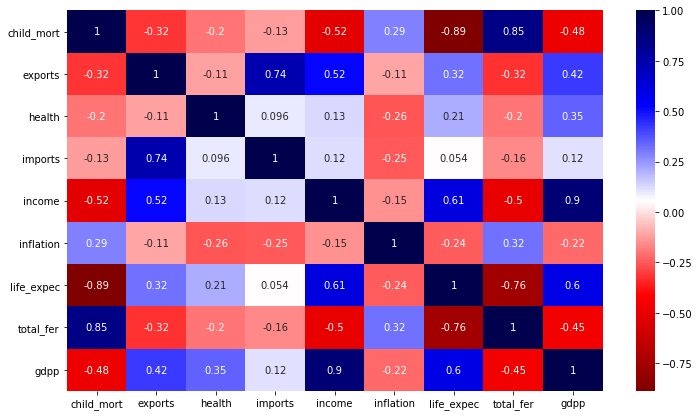

In [79]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True, cmap="seismic_r")
#plt.savefig('seismic',dpi=1000)
plt.show()

In [80]:
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df,
                        locationmode='country names',
                        locations='country',
                         title=i+' per country (World)',color=i,color_continuous_scale="Reds"
                       )
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show()


In [81]:
#focus on Europe
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df,
                        locationmode='country names',
                        locations='country',
                        color=i, title=i+' per country (Europe)',scope='europe',color_continuous_scale="Greens"
                       )
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show()


In [82]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\diego\a

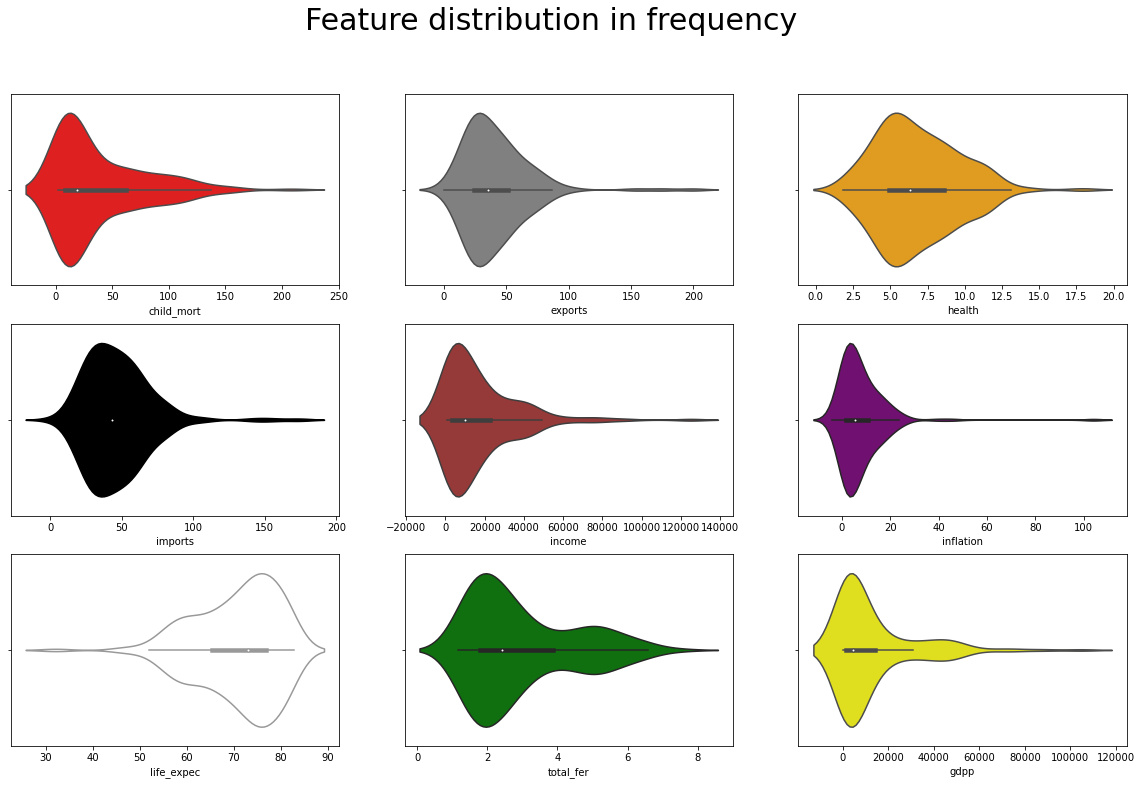

In [83]:
plt.figure(figsize=(20, 12))
plt.suptitle('Feature distribution in frequency',size=30)
plt.subplot(3,3,1)
sns.violinplot(df.child_mort,color='red')
plt.subplot(3,3,2)
sns.violinplot(df.exports,color='grey')
plt.subplot(3,3,3)
sns.violinplot(df.health,color='orange')
plt.subplot(3,3,4)
sns.violinplot(df.imports,color='black')
plt.subplot(3,3,5)
sns.violinplot(df.income,color='brown')
plt.subplot(3,3,6)
sns.violinplot(df.inflation,color='purple')
plt.subplot(3,3,7)
sns.violinplot(df.life_expec,color='white')
plt.subplot(3,3,8)
sns.violinplot(df.total_fer,color='green')
plt.subplot(3,3,9)
sns.violinplot(df.gdpp,color='yellow')
plt.show()
#plt.savefig('ViolinPlots_figures.png',dpi=1000)

## <font color='blue'> Scaling the data </font> 

In [84]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled=pd.DataFrame(df_scaled,columns=df.iloc[:,1:].columns, index=df.index )
df_final=pd.concat([df.iloc[:,0],df_scaled],axis=1)
#df_scaled.to_csv('df_scaled.csv')

In [63]:
#df_final.to_csv('df_final.csv')
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## <font color='blue'> Kmeans and Silhouette score </font> 

Silhouettes score per cluster: {2: 0.28735668921406704, 3: 0.28329575683463126, 4: 0.2959517057752815, 5: 0.3064507657886972, 6: 0.2340068670825658, 7: 0.24763190473243407, 8: 0.22907030019761146, 9: 0.20805042111602115} 
 


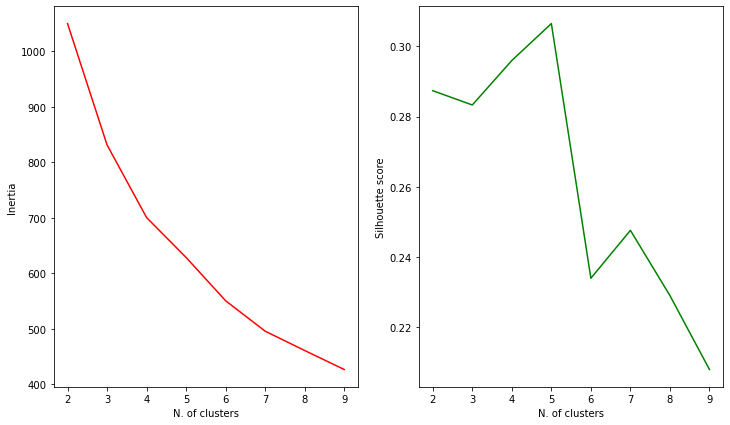

In [64]:
#You can try to apply also hopkins test for testing if the dataset is clusterable

silhouettes={}
inertia = []
range_n_clusters = list(range(2,10,1))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=60)
    kmeans.fit(df_final.iloc[:,1:])
    silhouette_avg = silhouette_score(df_final.iloc[:,1:], kmeans.labels_)
    inertia.append(kmeans.inertia_)
    silhouettes[num_clusters]=silhouette_avg
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.plot(range_n_clusters,inertia,color='red')
plt.xlabel('N. of clusters')
plt.ylabel('Inertia')


plt.subplot(1,2,2)
plt.plot(silhouettes.keys(),silhouettes.values(),color='green')
plt.xlabel('N. of clusters')
plt.ylabel('Silhouette score')


#inertia: mean squared distance between each instance and its closest centroid

print(f'Silhouettes score per cluster: {silhouettes} \n ')

## <font color='blue'> Choose the optimal number of clusters </font> 

In [65]:
kmeans = KMeans(n_clusters=4, random_state= 50)
kmeans.fit(df_scaled)
print(f' Labels: {kmeans.labels_}')

 Labels: [1 2 2 1 2 2 2 0 0 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 2 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 3 2 1 1 2 2 1 3 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 3 2 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [66]:
kmeans = KMeans(n_clusters=3, random_state= 50)
kmeans.fit(df_scaled)
print(f' Labels: {kmeans.labels_}')

 Labels: [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [67]:
df_labeled=pd.concat([df,pd.Series(kmeans.labels_,name='label')],axis=1)  #I take the initial dataset: 
#the one that it wasn't scaled
#df_labeled.to_csv('df_labeled.csv')
df_labeled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [68]:
df_labeled2=df_labeled.copy()

In [69]:

df_labeled2['label'].loc[df_labeled2['label'] == 2 ]=0.5
df_labeled2['label'].loc[df_labeled2['label'] == 1 ]=2
df_labeled2['label'].loc[df_labeled2['label'] == 0.5 ]=1
#df_labeled2[df_labeled2['label'] == 2 ]['label']=df_labeled2[df_labeled2['label'] == 1 ]['label'].replace(1,2,inplace=True)
#df_labeled2[df_labeled2['label'] == 2 ]['label']=df_labeled2[df_labeled2['label'] == 2 ]['label'].replace(0.5,1,inplace=True)

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## <font color='blue'> K-means labels plots  </font> 

In [70]:

#df = px.data.tips()
#df_labeled.loc[:,"label"] = df_labeled.loc[:,"label"].astype(str)
fig = px.parallel_coordinates(df_labeled2.iloc[:,1:],title='Features vs Labels: Interactive Plots',color='label')#,
                              #color_continuous_scale=px.colors.sequential.RdBu_r)
#color_discrete_sequence=["red", "blue", "black", "green"])# 
#fig.write_html("features_and_labels_plot_interactive.html")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(coloraxis_colorbar=dict(title=df_labeled2['label'].name),legend_title_text='Label', 
                 title_pad_l=300,title_y=0.98)        
#fig.write_html("features_and_labels_plot_interactive.html")
#fig.write_image("features_and_labels_plot_interactive.png",scale=3)
fig.show()

In [71]:
#df_labeled2.loc[:,'label'].astype(int)
df_labeled2['label'].loc[df_labeled2['label'] == 2 ]= 'Help needed'
df_labeled2['label'].loc[df_labeled2['label'] == 1 ]= 'Might need help'
df_labeled2['label'].loc[df_labeled2['label'] == 0 ]='Help not needed'


In [72]:
fig = px.choropleth(df_labeled2[['country','label']],
                    locationmode='country names',
                    locations='country',
                     title='Needed Help Per Country (World)',
                     color_discrete_sequence=["orange", "red", "green",'black'],color=df_labeled2['label'], 
                     #color_discrete_sequence=px.colors.sequential.Plasma
                    #color_discrete_sequence=px.colors.diverging.Earth
                    color_discrete_map={'Help needed':'Red',
                                        'Might need help':'Yellow',
                                        'Help not needed':'Green'} )
fig.update_geos(fitbounds="locations", visible=True)
#fig.update_layout(coloraxis_colorbar=dict(title=df_labeled2['label'].name))
fig.update_layout(legend_title_text='Labels',legend_title_side='top',title_pad_l=260,title_y=0.86)

#fig.write_html("NeededHelpPerCountry(World)kmeans.html")
#fig.write_image("NeededHelpPerCountry(World)kmeans.png",scale=3)
fig.show()

In [74]:
df_labeled2


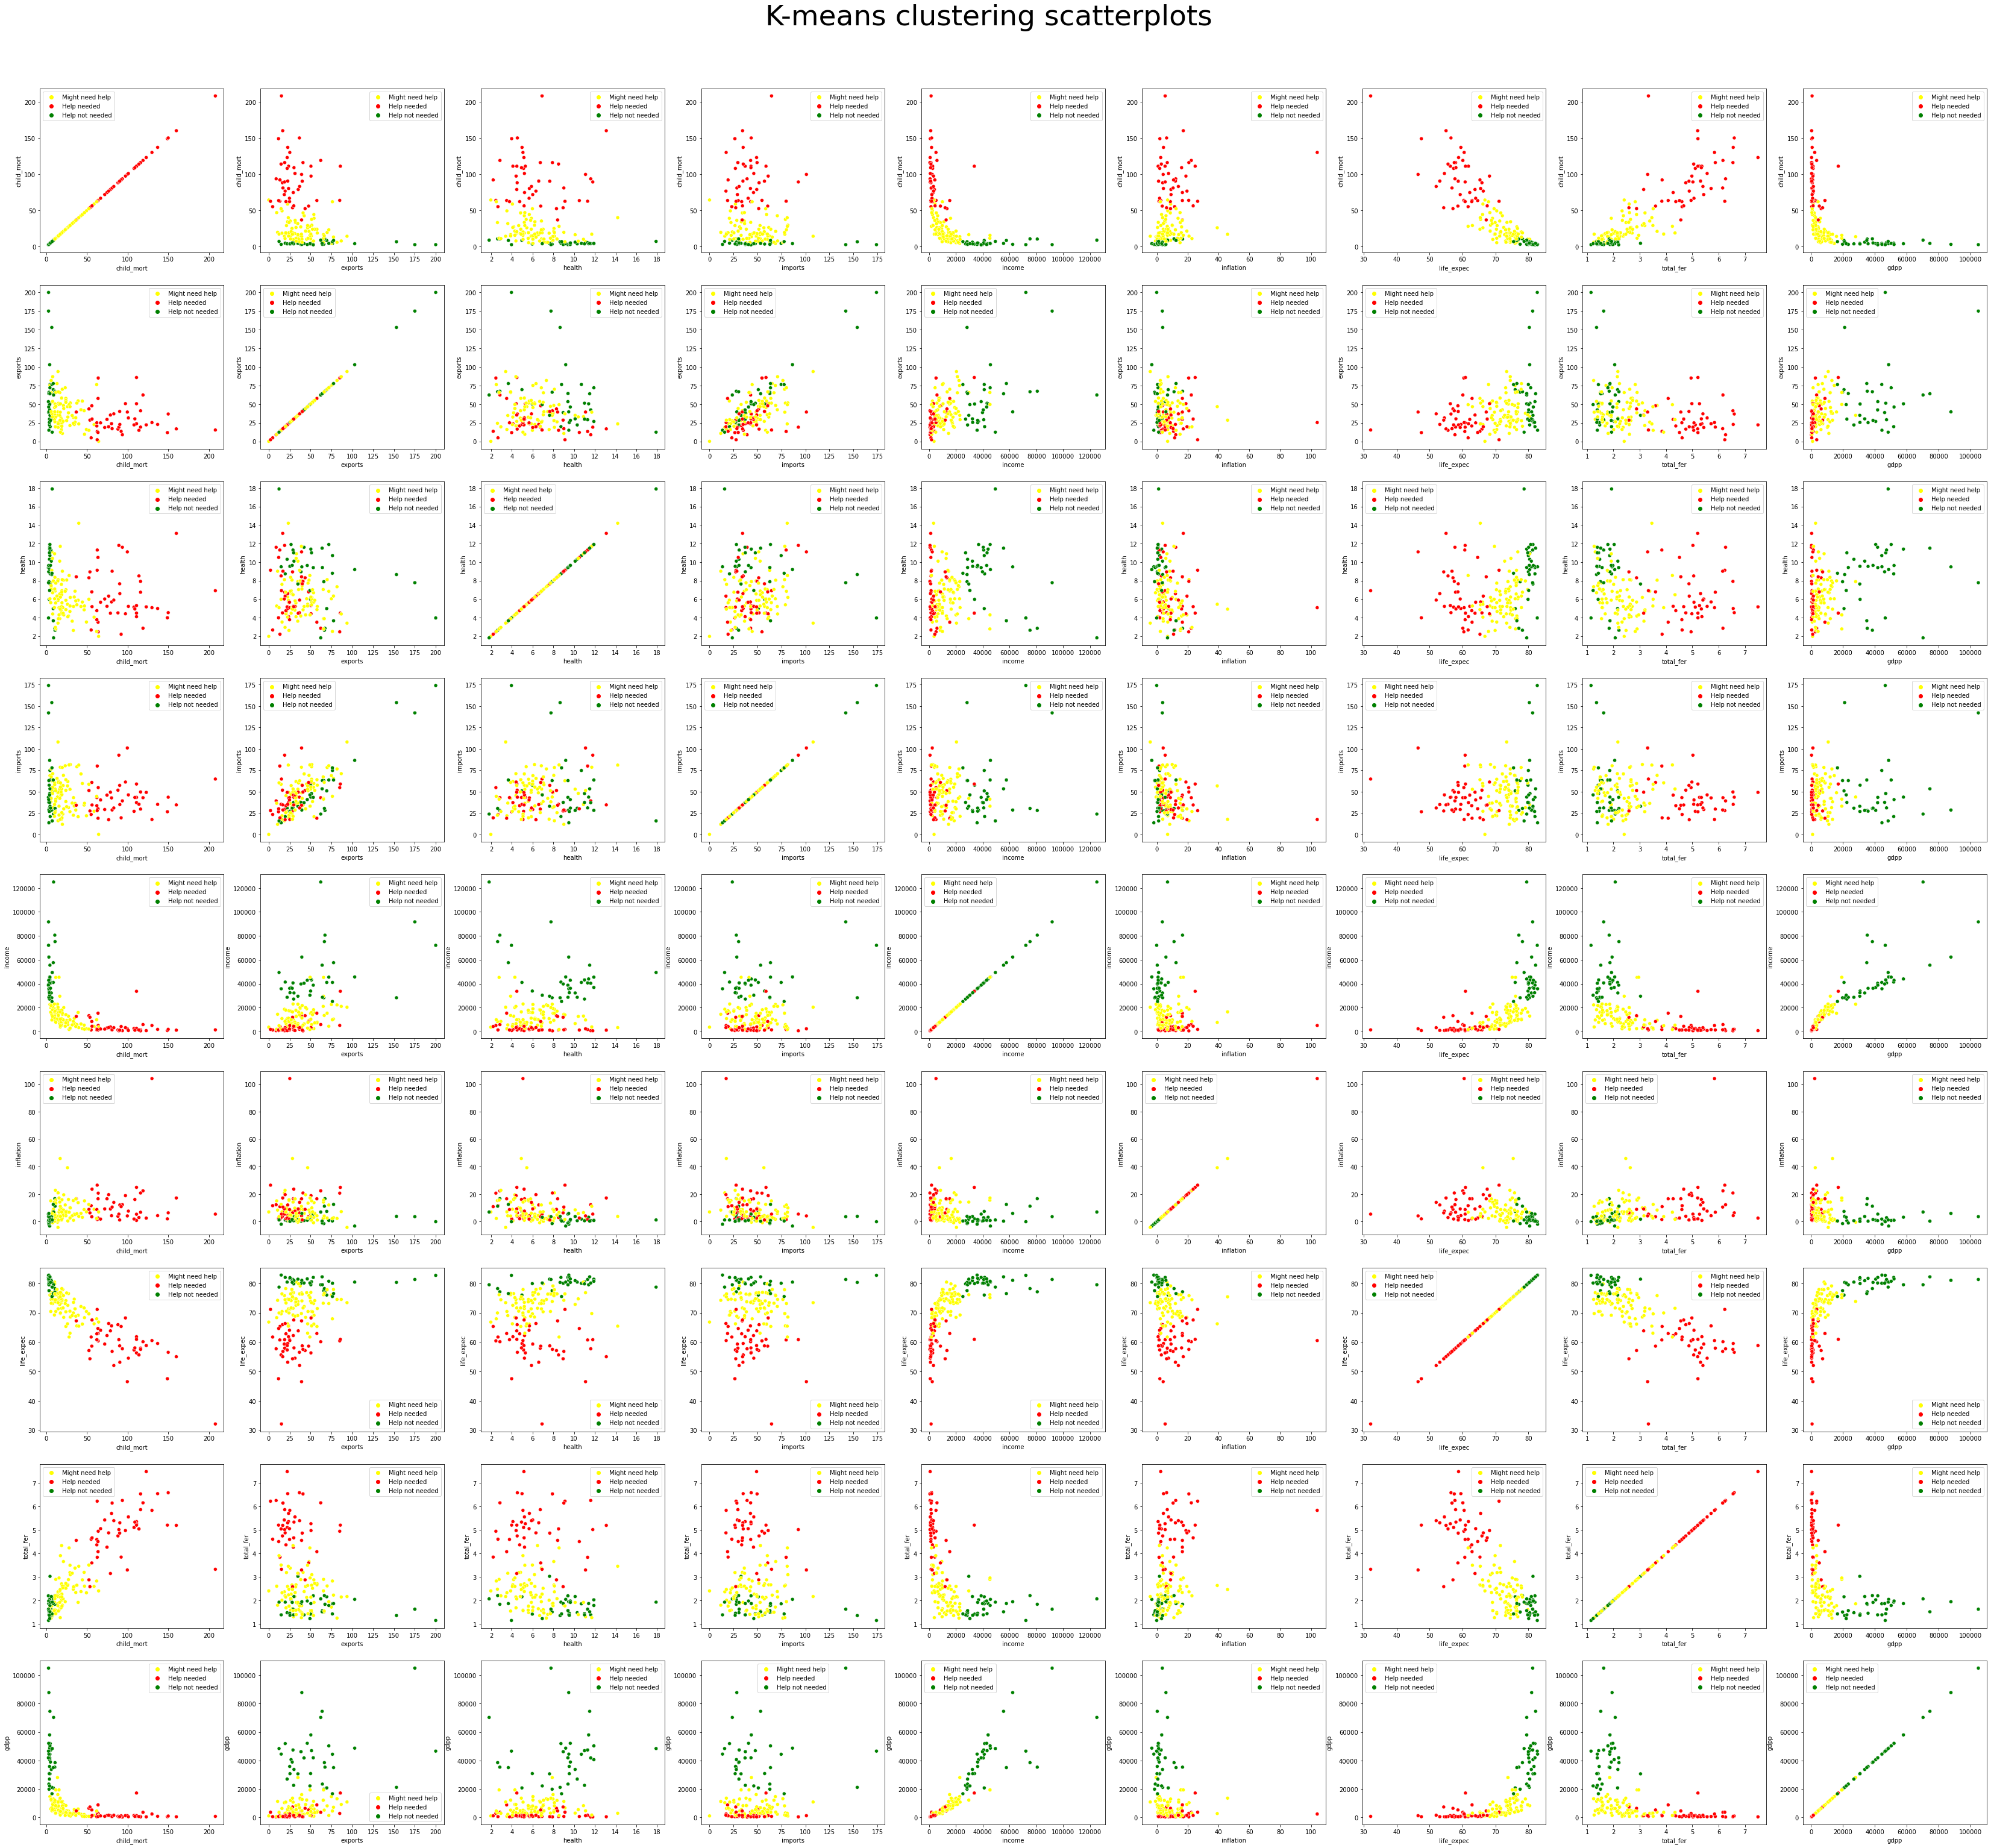

In [475]:
plt.figure(figsize = (71, 65))
plt.suptitle('K-means clustering scatterplots',fontsize=47,y=0.91,x=0.433)
for j in range(len(df_labeled2.iloc[1:].columns)-2):
    for i in range(len(df_labeled2.iloc[1:].columns)-2):
        plt.subplot(len(df_labeled2.iloc[1:].columns),len(df_labeled2.iloc[1:].columns),i+1+j*len(df_labeled2.iloc[1:].columns))
        g=sns.scatterplot(x = df_labeled2.iloc[:,i+1], y = df_labeled2.iloc[:,j+1], data = df_labeled2[1:], hue = 'label', palette = ['yellow','red','green'])
        g.legend(fontsize=10)
#plt.legend(bbox_to_anchor =(0.65, 1.25))
#plt.savefig('K-means clustering scatterplots.png',dpi=300, facecolor='w')
plt.show()

In [37]:
#fig.write_html("world_help.html")
n_clust=3